In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

import numpy as np
import time
import matplotlib.pyplot as plt
import os

from PIL import Image

In [3]:
#Vaap1997

dataset = '/content/drive/MyDrive/AML - Group Project/chest_xray_reshuffle'

## Plotting One image

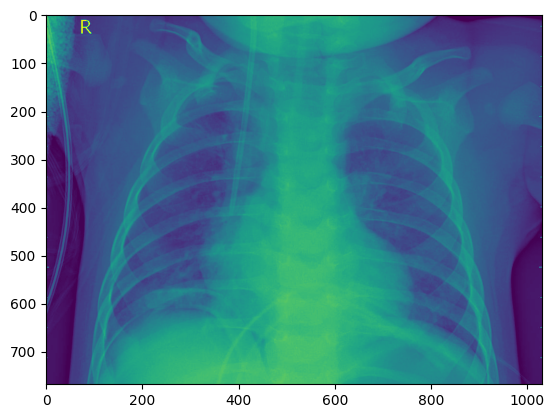

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(dataset+"/train/PNEUMONIA/person376_bacteria_1715.jpeg")
plt.imshow(np.asarray(img))



## TRANSFEER LEARNING


In [5]:
import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import os

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

from PIL import Image

In [6]:
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8,1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std  = [0.229,0.224,0.225] )
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std  = [0.229,0.224,0.225] )
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [7]:

train_directory = os.path.join(dataset,'train')
valid_directory = os.path.join(dataset,'val')
test_directory = os.path.join(dataset,'test')

bs = 32

num_classes = len(os.listdir(valid_directory))
print(num_classes)

data = {
    'train': datasets.ImageFolder(root=train_directory, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory, transform=image_transforms['valid']),
    'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
}


idx_to_class = {v:k for k,v in data['train'].class_to_idx.items()}
print(idx_to_class)

train_data_size = len(data['train'])
valid_data_size = len(data['valid'])
test_data_size = len(data['test'])

print(f"train_data_size:{train_data_size} , valid_data_size:{valid_data_size} and test_data_size:{test_data_size}")
train_data_loader = DataLoader(data['train'],batch_size=bs,shuffle=True)
valid_data_loader = DataLoader(data['valid'],batch_size=bs,shuffle=True)



2
{0: 'NORMAL', 1: 'PNEUMONIA'}
train_data_size:4686 , valid_data_size:585 and test_data_size:585


In [8]:
alexnet = models.alexnet(pretrained=True)
alexnet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 99.7MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
#Freese models parameters
for param in alexnet.parameters():
  param.requires_grad = False

In [10]:
## Hyperparameter tunning
lrs_params = [0.1,0.01,0.001]
dropout_params = [0.1,0.25,0.5]


## Testing different architectures
Test1 is the basic transfer learning AlexNet and Test5 is the transfer learning winner architecture for Alexnet with additional layers

### Test1 - Basic Transfeer Learning

In [11]:
alexnet.classifier[6] = nn.Linear(4096,num_classes)
alexnet.classifier.add_module("7",nn.LogSoftmax(dim=1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Test2 - Further changes

In [ ]:
alexnet.classifier[4] = nn.Linear(4096,4096)
alexnet.classifier[6] = nn.Linear(4096,num_classes)
alexnet.classifier.add_module("7",nn.LogSoftmax(dim=1))
alexnet

### Test3 - dropOuts

In [ ]:
alexnet.classifier[3] = nn.Dropout(p=0.25, inplace=False)
alexnet.classifier[0] = nn.Dropout(p=0.25, inplace=False)
alexnet.classifier[4] = nn.Linear(4096,2048)
alexnet.classifier[6] = nn.Linear(2048,num_classes)
alexnet.classifier.add_module("7",nn.LogSoftmax(dim=1))
alexnet

### Test4 - Adding a classifier

In [ ]:
alexnet.classifier[6] = nn.Linear(4096,2048)
alexnet.classifier.add_module("7",nn.ReLU(inplace=True))
alexnet.classifier.add_module("8",nn.Dropout(p=0.25, inplace=False))
alexnet.classifier.add_module("9",nn.Linear(2048,2048))
alexnet.classifier.add_module("10",nn.ReLU(inplace=True))
alexnet.classifier.add_module("11",nn.Linear(2048,2))
alexnet.classifier.add_module("12",nn.LogSoftmax(dim=1))
alexnet

### Test5 - Adding a higher classifier

In [ ]:
alexnet.classifier[6] = nn.Linear(4096,2048)
alexnet.classifier.add_module("7",nn.ReLU(inplace=True))
alexnet.classifier.add_module("8",nn.Dropout(p=0.1, inplace=False))
alexnet.classifier.add_module("9",nn.Linear(2048,2048))
alexnet.classifier.add_module("10",nn.ReLU(inplace=True))
alexnet.classifier.add_module("11",nn.Dropout(p=0.1, inplace=False))
alexnet.classifier.add_module("12",nn.Linear(2048,1024))
alexnet.classifier.add_module("13",nn.ReLU(inplace=True))
alexnet.classifier.add_module("14",nn.Linear(1024,2))
alexnet.classifier.add_module("15",nn.LogSoftmax(dim=1))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Trainning

In [12]:
alexnet.to('cuda')

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [13]:
summary(alexnet,(3,224,224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [14]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(alexnet.parameters(),lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

#### Previous model

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [16]:
import torch
import time

# Move your model to the specified device
alexnet = alexnet.to(device)

def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch + 1, epochs))

        model.train()
        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = loss_criterion(outputs, labels)
            loss.backward()

            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            train_acc += acc.item() * inputs.size(0)

        with torch.no_grad():
            model.eval()

            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)

                loss = loss_criterion(outputs, labels)

                valid_loss += loss.item() * inputs.size(0)

                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                valid_acc += acc.item() * inputs.size(0)

        avg_train_loss = train_loss / train_data_size
        avg_train_acc = train_acc / train_data_size

        avg_valid_loss = valid_loss / valid_data_size
        avg_valid_acc = valid_acc / valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch + 1, avg_train_loss, avg_train_acc * 100, avg_valid_loss, avg_valid_acc * 100, epoch_end - epoch_start))

    return model, history


In [17]:
# Train and validate your model
num_epochs = 50
trained_model, history = train_and_validate(alexnet, loss_func, optimizer, num_epochs)

# Save the training history
torch.save(history, 'training_history_without_top_layers.pt')

Epoch: 1/50
Epoch : 001, Training: Loss: 0.2429, Accuracy: 89.4793%, 
		Validation : Loss : 0.2664, Accuracy: 89.7436%, Time: 1994.4147s
Epoch: 2/50
Epoch : 002, Training: Loss: 0.1973, Accuracy: 92.5736%, 
		Validation : Loss : 0.2705, Accuracy: 88.0342%, Time: 118.9090s
Epoch: 3/50
Epoch : 003, Training: Loss: 0.1964, Accuracy: 92.0188%, 
		Validation : Loss : 0.2734, Accuracy: 89.4017%, Time: 115.0478s
Epoch: 4/50
Epoch : 004, Training: Loss: 0.1998, Accuracy: 92.1468%, 
		Validation : Loss : 0.2831, Accuracy: 88.2051%, Time: 116.4634s
Epoch: 5/50
Epoch : 005, Training: Loss: 0.1834, Accuracy: 93.0004%, 
		Validation : Loss : 0.2783, Accuracy: 90.2564%, Time: 114.7493s
Epoch: 6/50
Epoch : 006, Training: Loss: 0.1780, Accuracy: 92.8297%, 
		Validation : Loss : 0.3101, Accuracy: 88.8889%, Time: 115.1299s
Epoch: 7/50
Epoch : 007, Training: Loss: 0.1832, Accuracy: 92.9364%, 
		Validation : Loss : 0.4193, Accuracy: 83.4188%, Time: 120.7217s
Epoch: 8/50
Epoch : 008, Training: Loss: 0.1960

In [ ]:
history_df = pd.DataFrame(history, columns=['avg_train_loss','avg_valid_loss', 'avg_train_acc', 'avg_valid_acc'])
history_df.to_csv('history_df_alexnet_without_top_layers.csv')

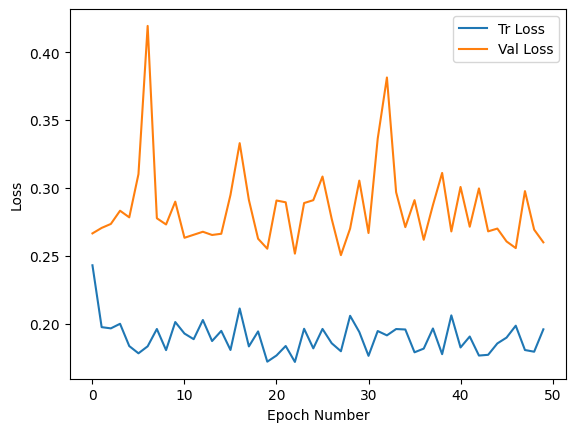

In [19]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.savefig(dataset+'_loss_curve.png')
plt.show()


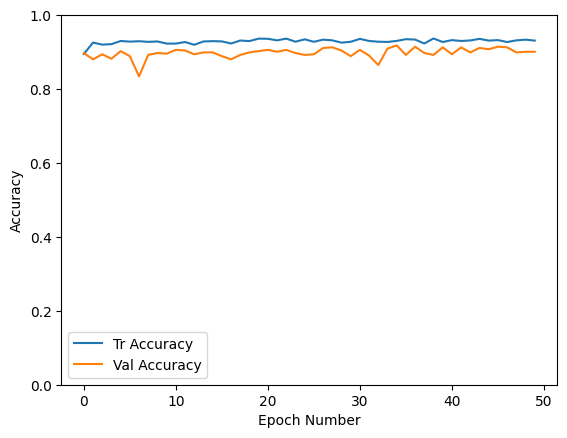

In [20]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [21]:
def predict(model):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    test_directory = os.path.join(dataset,'test')

    data = {
        'test': datasets.ImageFolder(root=test_directory, transform=image_transforms['test'])
    }

    idx_to_class = {v:k for k,v in data['test'].class_to_idx.items()}
    print(idx_to_class)

    test_data_size = len(data['test'])
    test_data_loader = DataLoader(data['test'],shuffle=False)

    model.eval()
    total_samples = 0
    correct_predictions = 0
    y_true = []
    y_score = []
    y_pred = []
    for inputs, labels in test_data_loader:
      with torch.no_grad():
        # Model outputs log probabilities
        inputs = inputs.to(device)
        labels = labels.to(device)
        out = model(inputs)
        #ps = torch.exp(out)
        #topk, topclass = ps.topk(2, dim=1)
        _, predicted = torch.max(out, 1)

        # Update counts
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        y_true.extend(labels.to('cpu').numpy())
        y_score.extend([torch.sigmoid(out).to('cpu').numpy()[0][1]])
        y_pred.extend(predicted.to('cpu').numpy())

    y_true = np.array(y_true)
    y_score = np.array(y_score)
    y_pred = np.array(y_pred)

    accuracy = correct_predictions / total_samples
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_score)
    pr_auc = average_precision_score(y_true, y_score)

    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    print(f'Test Precision: {precision * 100:.2f}%')
    print(f'Test Recall: {recall * 100:.2f}%')
    print(f'Test F1: {f1 * 100:.2f}%')
    print(f'Test Roc_auc: {roc_auc * 100:.2f}%')
    print(f'Test Pr_auc: {pr_auc * 100:.2f}%')

In [22]:
test_directory = os.path.join(dataset,'test')
test_directory

'/content/drive/MyDrive/AML - Group Project/chest_xray_reshuffle/test'

In [23]:
predict(alexnet)

{0: 'NORMAL', 1: 'PNEUMONIA'}
Test Accuracy: 87.18%
Test Precision: 86.36%
Test Recall: 97.89%
Test F1: 91.77%
Test Roc_auc: 92.34%
Test Pr_auc: 95.96%


In [24]:
torch.save(alexnet.state_dict(), 'ALEXLNET_50_Epochs_without_top_layers.pth')